In [1]:
import osmnx as ox
import igraph as ig
import pandas as pd
import networkx as nx
import numpy as np
import multiprocessing as mp
import time
import random as rd
from itertools import product
import ast
from numpy import inf
import matplotlib.pyplot as plt
from IPython.display import clear_output
import scipy

In [2]:
beta_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/beta_data_dictionary.npy',
                          allow_pickle=True).item()

r_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/sigma_r_data_dictionary.npy',
                          allow_pickle=True).item()


alpha_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/Alphas_dictionary.npy',
                           allow_pickle=True).item()

frac_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/Frac_data_dictionary.npy',
                          allow_pickle=True).item()

In [3]:
beta_shuffle_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/beta_shuffle_data_dictionary.npy',allow_pickle=True).item()

r_shuffle_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/sigma_r_shuffle_data_dictionary.npy',
                          allow_pickle=True).item()


alpha_shuffle_data = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/Alphas_shuffle_dictionary.npy',allow_pickle=True).item()

frac_data_shuffle = np.load('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_Alpha_dicts/Frac_shuffle_data_dictionary.npy',
                          allow_pickle=True).item()

In [4]:
cities = ['Amsterdam', 'Berlin', 'Boston', 'Fortaleza', 'Lisbon', 'Madrid', 'Manhattan', 'Paris', 'Rome', 'San_Francisco']

In [15]:
x_range = [(94.915263277105, 36499.5996434573),
 (94.00913600905146, 85366.44397885315),
 (75.54482015622679, 36116.15227680681),
 (95.54235628198958, 36023.26957751662),
 (95.30924824922681, 26896.137104590474),
 (95.18915953036036, 47799.280718514296),
 (95.88486847879776, 26888.426273570753),
 (76.74136918900318, 25964.477518573876),
 (72.45013598455799, 86931.40443394876),
 (76.84653372336837, 25228.42052888164)]

y_range = [(0.05351190433110118, 0.8846875913861502),
 (0.015632850536389506, 1.1183040979388952),
 (0.06503451987966463, 0.9491169729723454),
 (0.023503282466227595, 1.1697750626381251),
 (0.04066381605481418, 1.4201528600155202),
 (0.06032120279427375, 1.0759061129994507),
 (0.03522267665283015, 1.2355867362364226),
 (0.046306117898507936, 1.479507787352641),
 (0.033542984931834614, 1.3034854456493807),
 (0.03973187128179165, 0.6553315183068014)]

[(94.915263277105, 36499.5996434573),
 (94.00913600905146, 85366.44397885315),
 (75.54482015622679, 36116.15227680681),
 (95.54235628198958, 36023.26957751662),
 (95.30924824922681, 26896.137104590474),
 (95.18915953036036, 47799.280718514296),
 (95.88486847879776, 26888.426273570753),
 (76.74136918900318, 25964.477518573876),
 (72.45013598455799, 86931.40443394876),
 (76.84653372336837, 25228.42052888164)]

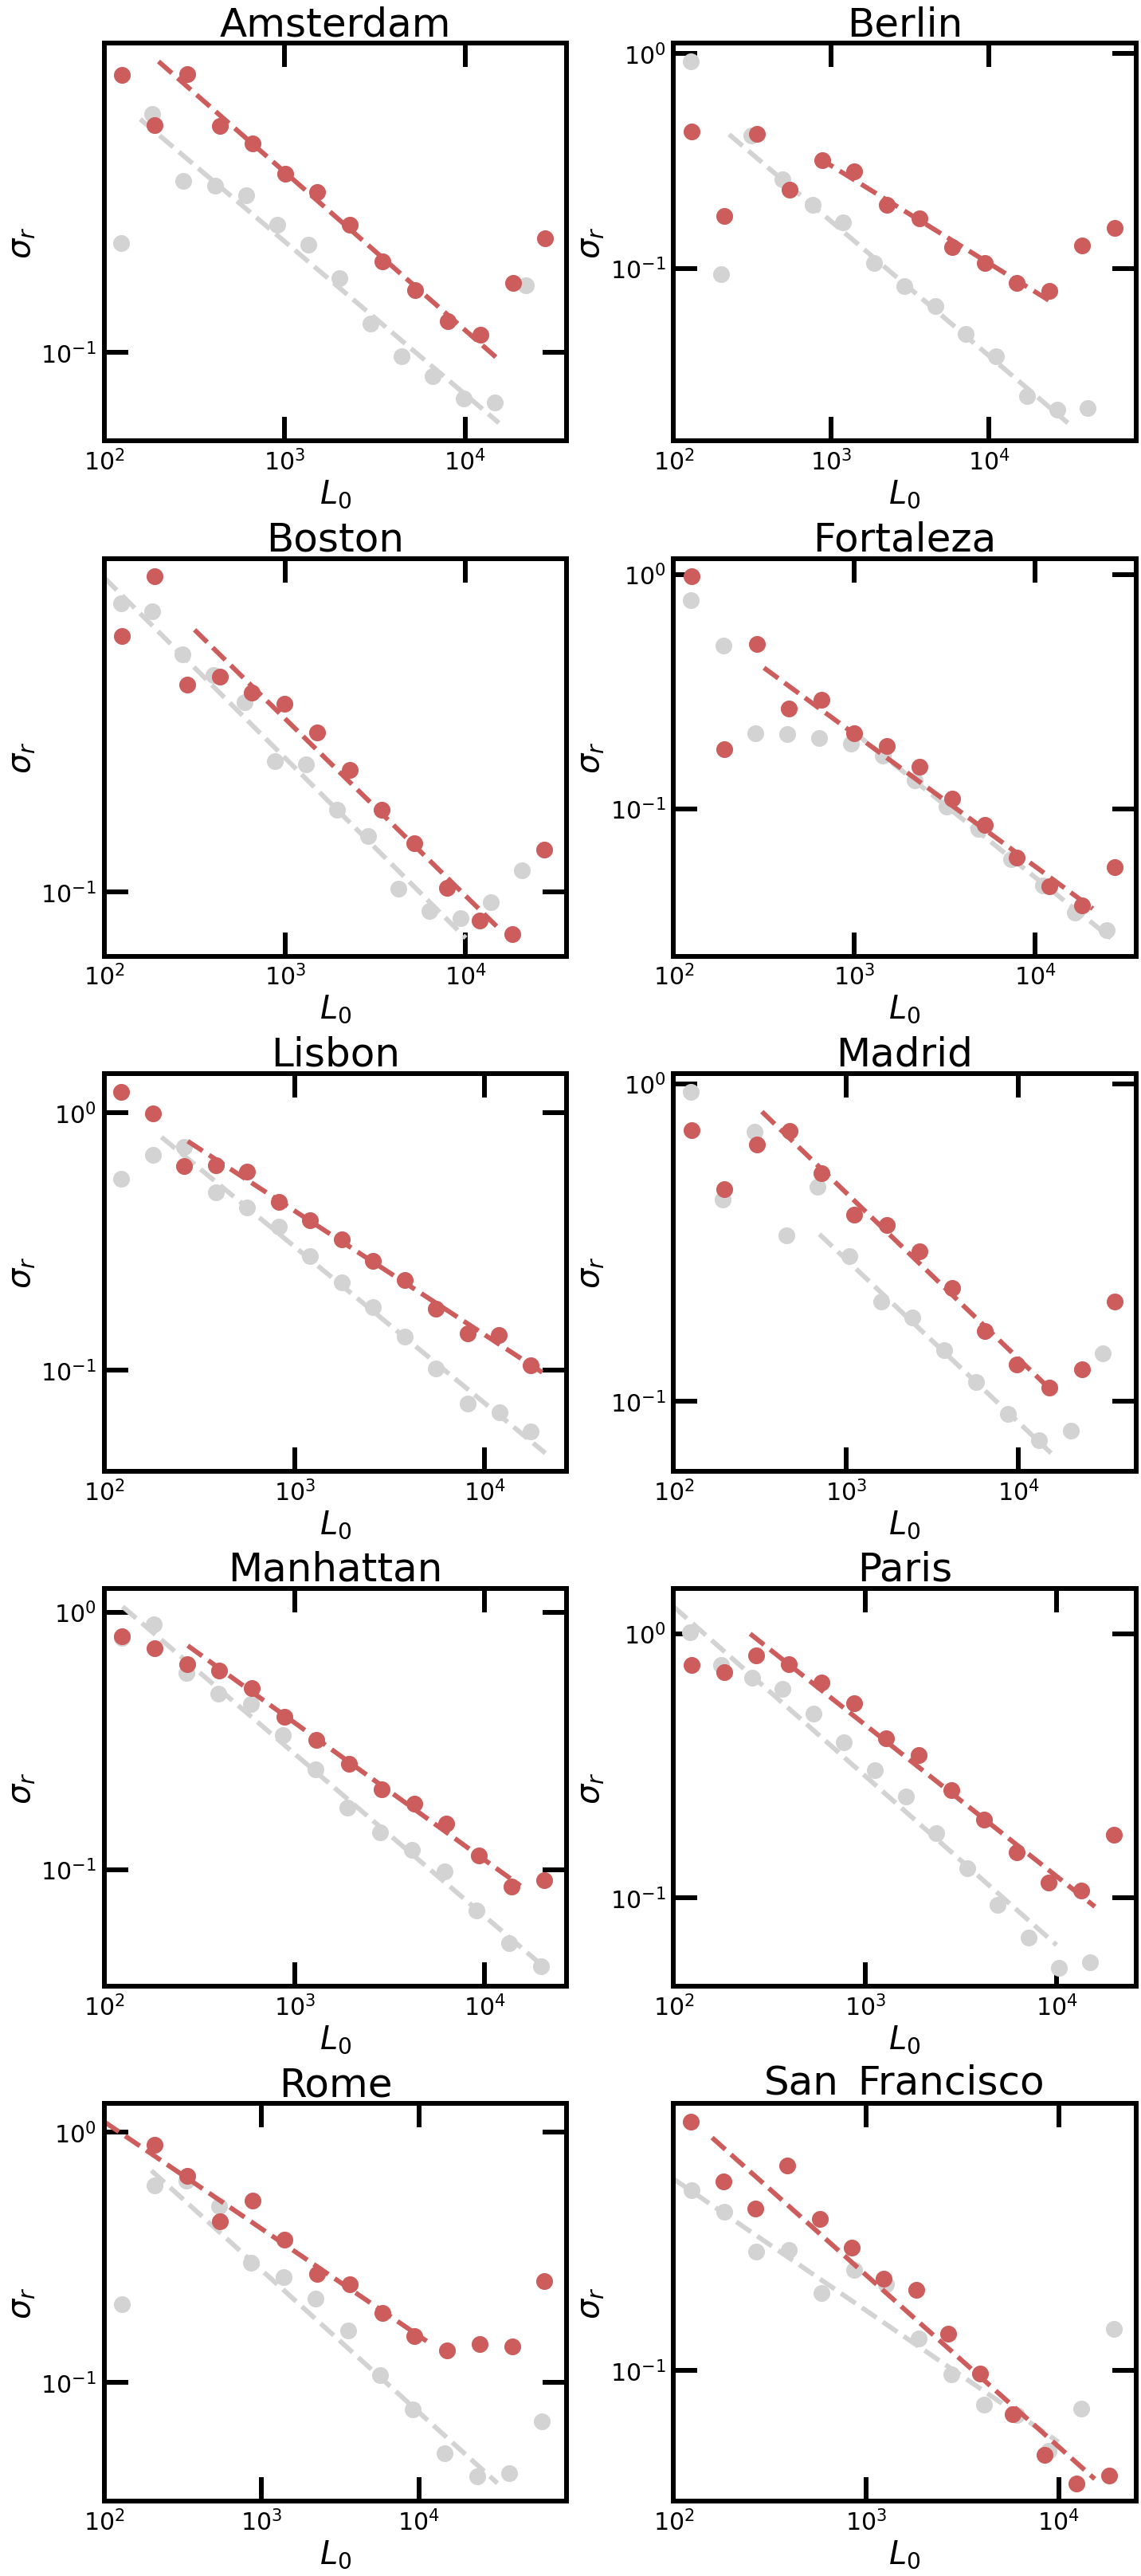

In [19]:
fig, axs = plt.subplots(5,2, figsize=(20,45))
s = 100
axs = axs.ravel()

for city in cities:
    i=cities.index(city)
    
    
    ##NO shuffle
    axs[i].plot((0.5*(r_data[city]['bins_r'][:-1]+r_data[city]['bins_r'][1:])), 
                r_data[city]['sigma_r_list'], 'o', markersize=20, color='lightgray', label='Original data')

    
    xx = 10**(np.linspace(np.log10(beta_data[city]['min_left']), 
                          np.log10(beta_data[city]['min_right']), 10))

    yy = (np.exp(beta_data[city]['best_intercept']))*(xx)**beta_data[city]['best_beta']
    axs[i].plot(xx, yy, '--', color='lightgray', linewidth=6)
    
    ##Shuffle
    
    axs[i].plot((0.5*(r_shuffle_data[city]['bins_r'][:-1]+r_shuffle_data[city]['bins_r'][1:])), 
            r_shuffle_data[city]['sigma_r_list'], 'o', markersize=20, color='indianred' ,label='Shuffle data')

    
    xx_shuffle = 10**(np.linspace(np.log10(beta_shuffle_data[city]['min_left']), 
                          np.log10(beta_shuffle_data[city]['min_right']), 10))

    yy_shuffle = (np.exp(beta_shuffle_data[city]['best_intercept']))*(xx_shuffle)**beta_shuffle_data[city]['best_beta']
    axs[i].plot(xx_shuffle, yy_shuffle, '--', color='indianred', linewidth=6)
    


    for axis in ['top','bottom','left','right']:
        axs[i].spines[axis].set_linewidth(6)
    
    axs[i].set_xlim(100, x_range[i][1])
    axs[i].set_title(city, fontsize=50)
    axs[i].set_xlabel('$L_{0}$', fontsize=40)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].set_ylabel('$\sigma_{r}}$', fontsize=40)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].tick_params(which='both', length=30, width=6, direction="in", pad=10)
    axs[i].tick_params(which='minor', length=0)

    axs[i].tick_params(labelsize=30)
    #legend = axs[i].legend(borderpad=1, labelspacing=2, fontsize=25, loc='best')
    #legend.get_frame().set_linewidth(2.5)
    #legend.get_frame().set_edgecolor('black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    
plt.tight_layout()
fig.savefig('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Beta_suplemental_material.eps',  facecolor='white')

In [23]:
x_range_alpha = [(94.31385521499092, 41711.74027594906),
 (94.00913002041433, 85366.44423780913),
 (94.73162801724331, 35729.01015356493),
 (94.87895065858112, 41699.87642395424),
 (95.30924824922681, 26896.137104590474),
 (95.18918794461929, 47799.28003907476),
 (95.9697229927769, 26393.402889266672),
 (94.85751242440308, 25703.75816069003),
 (95.56818567339556, 85792.50647743611),
 (95.51721322426178, 26893.345654636832)]

y_range_alpha = [(0.15623288723216142, 0.4347986636716983),
 (0.08220942957809199, 0.27299020147341524),
 (0.023298129858537544, 0.34813739321430814),
 (0.0845287479372197, 0.3552550427664219),
 (0.20728345207062474, 0.5611946017052966),
 (0.2377939808453218, 0.7128434484880913),
 (0.286238081240477, 0.681571442372741),
 (0.2824930133605591, 0.7018902753914621),
 (0.09303216006988256, 0.6474073353798601),
 (0.060538414797124115, 0.25164981321894064)]

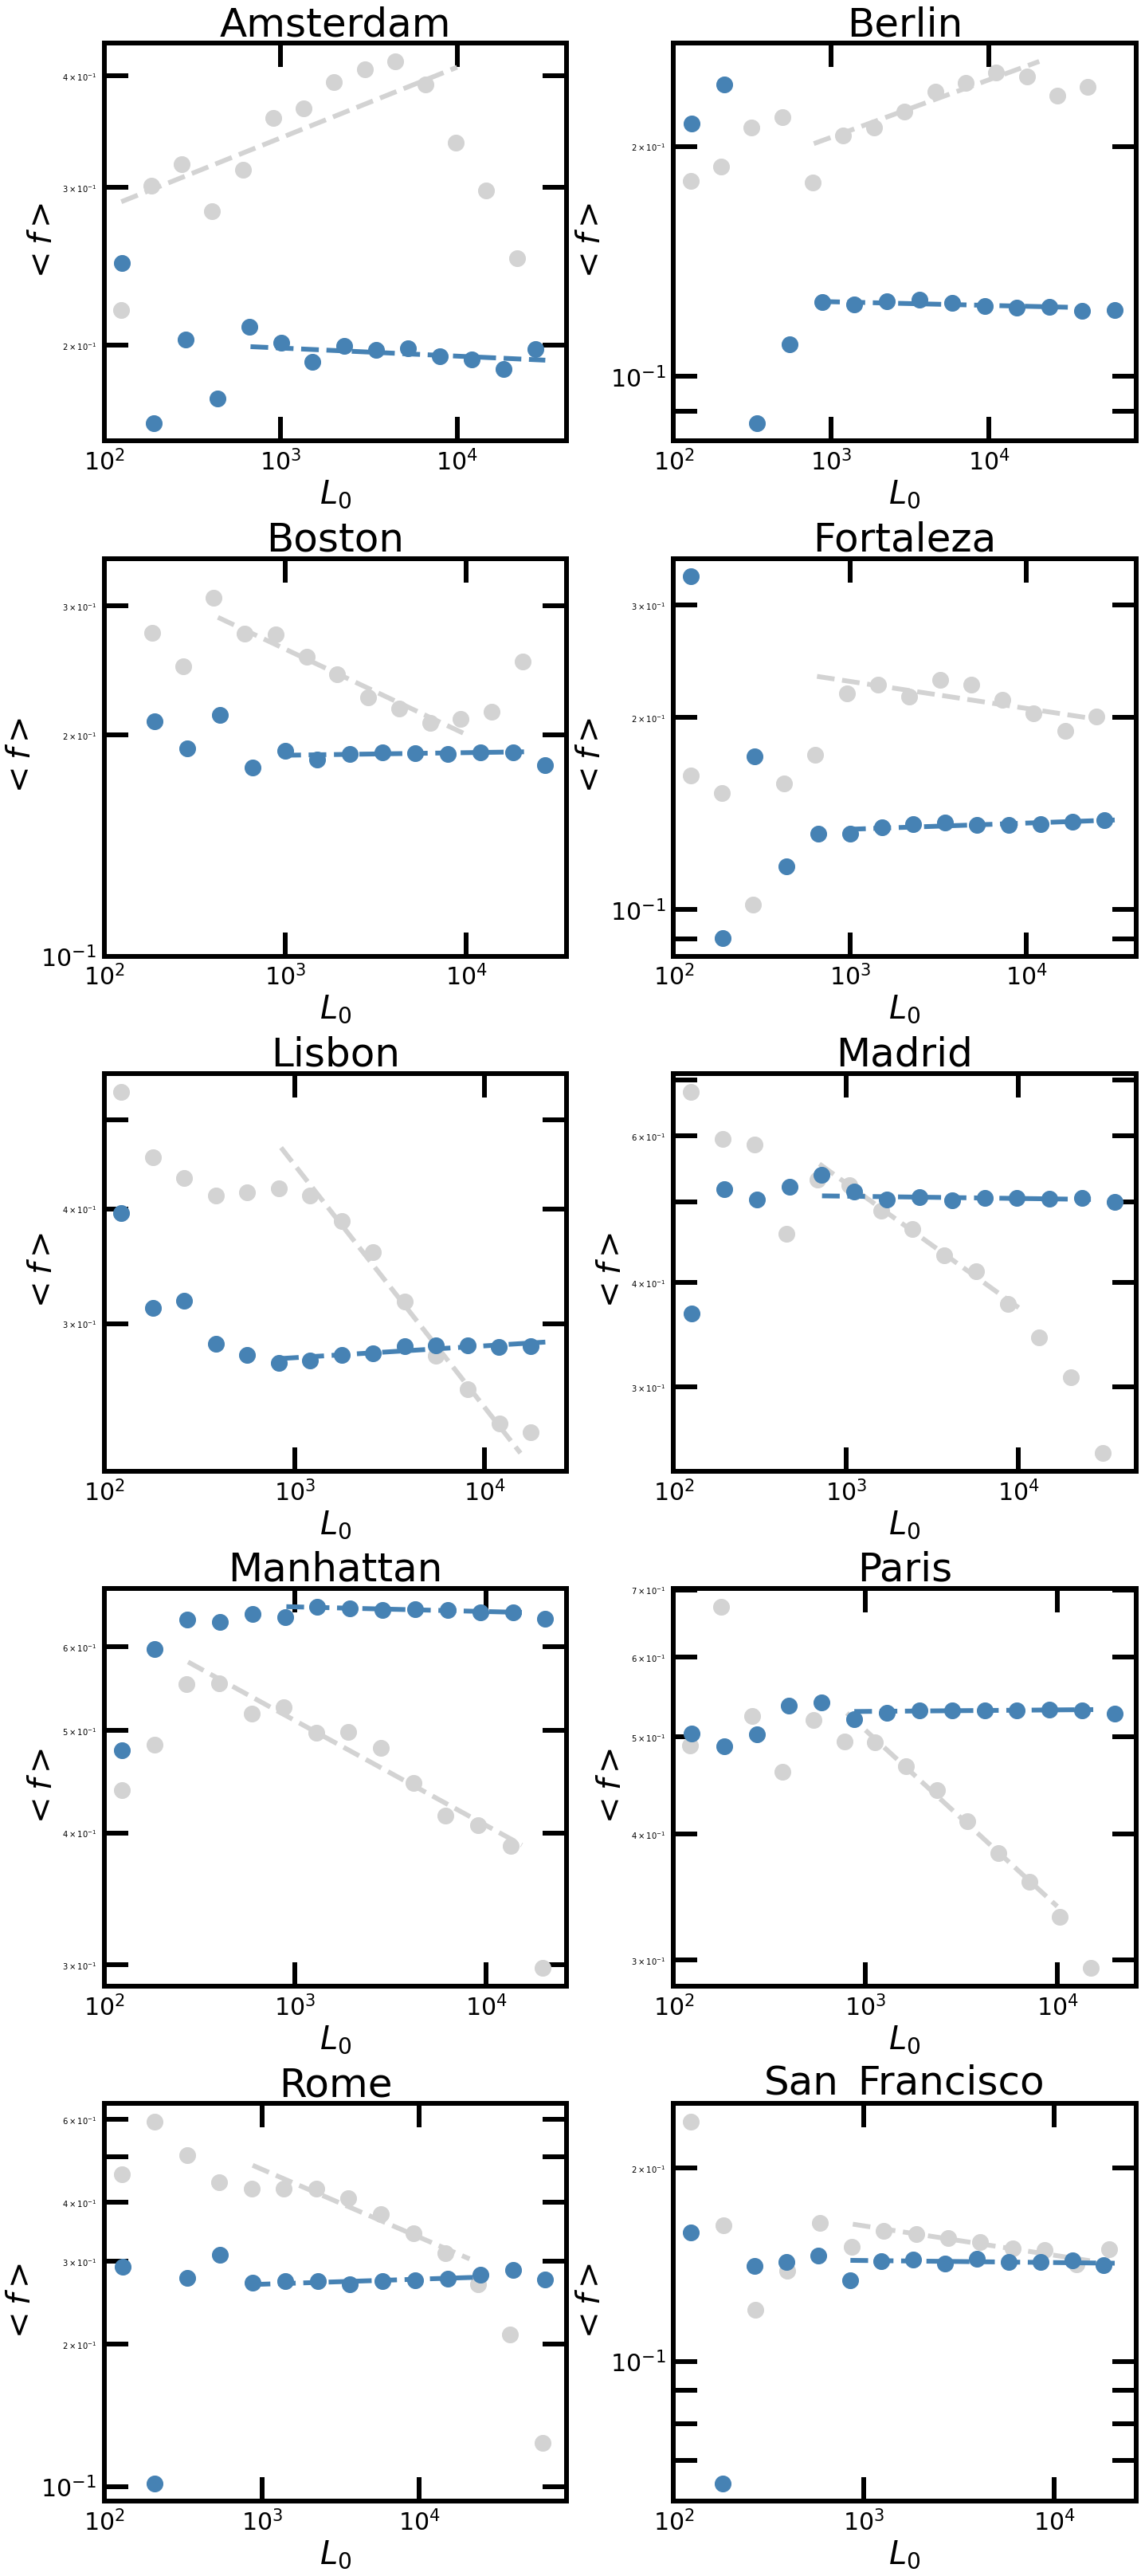

In [32]:
fig, axs = plt.subplots(5,2, figsize=(20,45))
s = 100
axs = axs.ravel()


for city in cities:
    i=cities.index(city)
    
    
    ##NO shuffle
    axs[i].plot((0.5*(frac_data[city]['bins_frac'][:-1]+frac_data[city]['bins_frac'][1:])), 
                frac_data[city]['mean_frac_list'], 'o', markersize=20, color='lightgray', label='Original data')
    
    xx = 10**(np.linspace(np.log10(alpha_data[city]['min_left']), 
                          np.log10(alpha_data[city]['min_right']), 10))
    
    yy = (np.exp(alpha_data[city]['best_intercept']))*(xx)**alpha_data[city]['best_alpha']
    axs[i].plot(xx, yy, '--', color='lightgray', linewidth=6)
    
    ##Shuffle
    
    axs[i].plot((0.5*(frac_data_shuffle[city]['bins_frac'][:-1]+frac_data_shuffle[city]['bins_frac'][1:])), 
                frac_data_shuffle[city]['mean_frac_list'], 'o', markersize=20, color='steelblue', label='Shuffle data')
    
    xx_shuffle = 10**(np.linspace(np.log10(alpha_shuffle_data[city]['min_left']), 
                          np.log10(alpha_shuffle_data[city]['min_right']), 10))

    yy_shuffle = (np.exp(alpha_shuffle_data[city]['best_intercept']))*(xx_shuffle)**alpha_shuffle_data[city]['best_alpha']
    axs[i].plot(xx_shuffle, yy_shuffle, '--', color='steelblue', linewidth=6)
    


    for axis in ['top','bottom','left','right']:
        axs[i].spines[axis].set_linewidth(6)
    
    axs[i].set_title(city, fontsize=50)
    axs[i].set_xlabel('$L_{0}$', fontsize=40)
    axs[i].xaxis.set_ticks_position('both')
    axs[i].set_ylabel('$<f>$', fontsize=40)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_tick_params(which='major', length=30, width=6, direction="in", pad=10)
    axs[i].yaxis.set_tick_params(which='both', length=30, width=6, direction="in", pad=10)

    
    axs[i].tick_params(labelsize=30)
    
    axs[i].set_xlim(100, x_range_alpha[i][1])
    
    if city == 'Boston':
        axs[i].set_ylim(10**(-1), y_range_alpha[i][1])
        
    #legend = axs[i].legend(borderpad=1, labelspacing=2, fontsize=25, loc='best')
    #legend.get_frame().set_linewidth(2.5)
    #legend.get_frame().set_edgecolor('black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

    
plt.tight_layout()
fig.savefig('/home/diogo_mota/Dropbox/Diogo_Rede_simetria/Alpha_suplemental_material.eps',  facecolor='white')